In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdf
tf.__version__

'2.2.0'

In [2]:
dataset,info = tfdf.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

In [3]:
train_dataset, test_dataset = dataset['train'],dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size,output_dim=64),
    tf.keras.layers.Convolution1D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          6176      
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 532,193
Trainable params: 532,193
Non-trainable params: 0
_________________________________________________________________


In [11]:
NUM_EPOCHS=10
history = model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 51s 131ms/step - loss: 0.1891 - accuracy: 0.9314 - val_loss: 0.3245 - val_accuracy: 0.8758
Epoch 2/10
391/391 [==============================] - 54s 138ms/step - loss: 0.1561 - accuracy: 0.9450 - val_loss: 0.3548 - val_accuracy: 0.8694
Epoch 3/10
391/391 [==============================] - 52s 133ms/step - loss: 0.1299 - accuracy: 0.9549 - val_loss: 0.4003 - val_accuracy: 0.8660
Epoch 4/10
391/391 [==============================] - 51s 130ms/step - loss: 0.1105 - accuracy: 0.9629 - val_loss: 0.4613 - val_accuracy: 0.8618
Epoch 5/10
391/391 [==============================] - 53s 134ms/step - loss: 0.0947 - accuracy: 0.9690 - val_loss: 0.4965 - val_accuracy: 0.8604
Epoch 6/10
391/391 [==============================] - 52s 133ms/step - loss: 0.0809 - accuracy: 0.9735 - val_loss: 0.5539 - val_accuracy: 0.8558
Epoch 7/10
391/391 [==============================] - 54s 139ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.6304 - val_ac

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

## Accuracy Plot

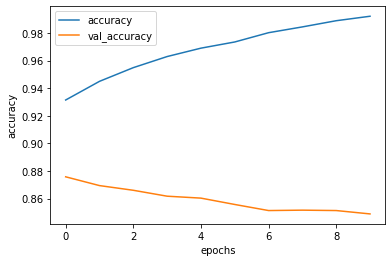

In [20]:
plot_graphs(history,'accuracy')

## Loss Plot

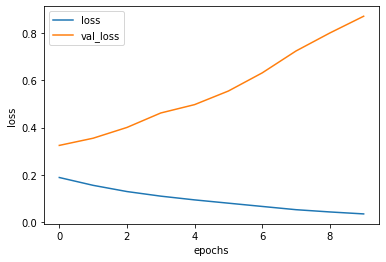

In [23]:
plot_graphs(history,'loss')